# Análisis del Paper: Minimum Covariance Determinant (MCD)

## Explicación del MCD

El **Estimador Mínimo Determinante de Covarianza (MCD)** es un método robusto para estimar la localización (vector de medias) y dispersión (matriz de covarianza) en datos multivariados. Su objetivo es resistir la influencia de valores atípicos (*outliers*), superando a los estimadores clásicos (media y covarianza muestral) en presencia de contaminación.

### Método MCD
1. **Definición**:
   - Dado un conjunto de datos $ X \in \mathbb{R}^{n \times p} $, el MCD busca el subconjunto de $ h $ observaciones ($ h \geq \lfloor (n + p + 1)/2 \rfloor $) cuya matriz de covarianza tiene el **determinante mínimo**.
   - **Localización estimada**: $ \hat{\mu}_{\text{MCD}} $ es la media de este subconjunto.
   - **Dispersión estimada**: $ \hat{\Sigma}_{\text{MCD}} $ es la covarianza del subconjunto, multiplicada por un **factor de consistencia** $ c_0 $.

2. **Reponderación**:
   - Mejora la eficiencia mediante:
     $$
     \hat{\mu}_{\text{MCD}} = \frac{\sum_{i=1}^n W(d_i^2) x_i}{\sum_{i=1}^n W(d_i^2)}, \quad
     \hat{\Sigma}_{\text{MCD}} = c_1 \frac{\sum_{i=1}^n W(d_i^2)(x_i - \hat{\mu}_{\text{MCD}})(x_i - \hat{\mu}_{\text{MCD}})^\top}{n},
     $$
     donde $ d_i = \sqrt{(x_i - \hat{\mu}_0)^\top \hat{\Sigma}_0^{-1}(x_i - \hat{\mu}_0)} $ y $ W(d^2) = I(d^2 \leq \chi_{p,0.975}^2) $.

3. **Propiedades Clave**:
   - **Equivarianza afín**: Bajo transformaciones lineales $ Ax + b $, los estimadores se transforman consistentemente.
   - **Punto de ruptura alto**: Soporta hasta $ \lfloor (n - p + 1)/2 \rfloor $ outliers.
   - **Función de influencia acotada**: Limitada sensibilidad a observaciones extremas.

---

## Respuestas a los Puntos

### a. **Efecto "Masking"**
Ocurre cuando los outliers distorsionan los estimadores clásicos (media y covarianza), haciendo que las distancias de Mahalanobis $ MD(x_i) $ no detecten outliers. Ejemplo: En la Figura 1 del paper, la elipse clásica intenta abarcar todos los datos, enmascarando 8 outliers detectados por el MCD.

### b. **Efecto "Swamping"**
Fenómeno inverso: observaciones normales son clasificadas erróneamente como outliers debido a la influencia de verdaderos outliers en estimadores clásicos. No se menciona en el paper, pero es una consecuencia de métodos no robustos.

### c. **Robustez del MCD**
- **Resistencia a outliers**: Selecciona un subconjunto $ h $-optimal, ignorando observaciones extremas.
- **Reponderación**: Aumenta eficiencia sin perder robustez.
- **Punto de ruptura alto**: Soporta hasta 50% de contaminación (si $ h = \lfloor (n + p + 1)/2 \rfloor $).

### d. **Supuestos del MCD**
1. **Distribución elíptica y unimodal**: Densidad $ f(x) = \frac{1}{\sqrt{|\Sigma|}} g((x - \mu)^\top \Sigma^{-1}(x - \mu)) $, con $ g $ decreciente.
2. **Tamaño muestral**: $ n > 5p $ para evitar problemas de dimensionalidad.
3. **Ausencia de estructuras no elípticas**: Ejemplo: clusters múltiples.

### e. **Elipse de Tolerancia**
Región que contiene el 97.5% de los datos bajo normalidad:
- **Clásica**: Basada en $ \bar{x} $ y $ S $, con ejes $ \sqrt{\lambda_i \chi_{p,0.975}^2} $ (valores propios de $ S $).
- **Robusta (MCD)**: Usa $ \hat{\mu}_{\text{MCD}} $ y $ \hat{\Sigma}_{\text{MCD}} $, resistente a outliers.

### f. **Equivarianza Afín**
Un estimador $ T $ es afín-equivariante si para toda matriz no singular $ A $ y vector $ b $:
$$
T(AX + b) = A T(X) + b, \quad \hat{\Sigma}(AX + b) = A \hat{\Sigma}(X) A^\top.
$$
El MCD cumple esto, asegurando invarianza ante rotaciones, escalamientos o traslaciones.

### g. **Punto de Ruptura**
Mínima fracción $ \epsilon^* $ de datos que pueden volver el estimador arbitrariamente incorrecto. Para el MCD:
$$
\epsilon^* = \frac{\min(n - h + 1, h - p)}{n}.
$$
Con $ h = \lfloor (n + p + 1)/2 \rfloor $, $ \epsilon^* \approx 50\% $.

### h. **Eficiencia del MCD**
- **MCD crudo**: Baja eficiencia (6% para $ p=2 $, 20.5% para $ p=10 $).
- **Reponderado**: Eficiencia mejora (45.5% para $ p=2 $, 82% para $ p=10 $).

### i. **Outliers y Valores Propios Clásicos**
Los outliers inflan o reducen los valores propios de $ S $, alterando la forma de la elipse. Ejemplo: Un outlier lejano aumenta $ \lambda_1 $, alargando la elipse en su dirección.

### j. **Valores Propios Clásicos en la Elipse**
Los valores propios $ \lambda_i $ de $ S $ definen la longitud de los ejes ($ \sqrt{\lambda_i \chi_{p,0.975}^2} $). Outliers distorsionan $ \lambda_i $, generando elipses sobreajustadas.

### k. **Valores Propios MCD en la Elipse**
Los valores propios de $ \hat{\Sigma}_{\text{MCD}} $ reflejan la estructura de datos limpios. La elipse robusta se ajusta a la mayoría de los datos, ignorando outliers.


## Notas sobre funciones de profundidad estadística
A continuación, se presentan notas detalladas y rigurosas en markdown sobre las funciones de profundidad estadística, basadas en el artículo *"General Notions of Statistical Depth Function"* de Yijun Zuo y Robert Serfling. Se abordan las cualidades deseadas, los tipos de funciones de profundidad y una explicación específica de las profundidades de Mahalanobis, Half Space de Tukey y espacial.

### 1. Cualidades que debe tener una función de profundidad
Una función de profundidad estadística, $D(\cdot; P)$, definida para una distribución $P$ en $\mathbb{R}^d$, debe proporcionar un ordenamiento de los puntos desde el centro hacia afuera. Para ser considerada ideal, debe satisfacer las siguientes cuatro propiedades matemáticamente precisas:

1. **P1. Invarianza Afín**  
   La profundidad de un punto $x \in \mathbb{R}^d$ no debe depender del sistema de coordenadas ni de las escalas de las variables. Formalmente, para cualquier vector aleatorio $X \in \mathbb{R}^d$, cualquier matriz no singular $A \in \mathbb{R}^{d \times d}$ y cualquier vector $b \in \mathbb{R}^d$,  
   $$D(Ax + b; F_{AX + b}) = D(x; F_X),$$  
   donde $F_X$ es la distribución de $X$ y $F_{AX + b}$ la de $AX + b$. Esto asegura que la función sea robusta ante transformaciones afines.

2. **P2. Maximalidad en el Centro**  
   Para una distribución $F$ con un "centro" único $\theta$ (por ejemplo, un punto de simetría según alguna definición), la profundidad debe alcanzar su máximo en $\theta$:  
   $$D(\theta; F) = \sup_{x \in \mathbb{R}^d} D(x; F).$$  
   Esto implica que el punto más profundo coincide con el centro de la distribución, asumiendo que dicho centro está bien definido (e.g., en distribuciones simétricas).

3. **P3. Monotonía Relativa al Punto Más Profundo**  
   La profundidad debe disminuir monotónicamente a medida que un punto $x \in \mathbb{R}^d$ se aleja del punto más profundo $\theta$ a lo largo de cualquier rayo fijo que pase por $\theta$. Matemáticamente, para cualquier $\alpha \in [0, 1]$,  
   $$D(x; F) \leq D(\theta + \alpha(x - \theta); F).$$  
   Esto garantiza que la función refleje un ordenamiento centro-afuera consistente.

4. **P4. Desvanecimiento en el Infinito**  
   La profundidad debe tender a cero cuando la norma del punto $x$ crece sin límite:  
   $$D(x; F) \to 0 \quad \text{a medida que} \quad \|x\| \to \infty, \quad \text{para cada} \quad F \in \mathscr{F},$$  
   donde $\mathscr{F}$ es la clase de distribuciones en $\mathbb{R}^d$. Esto asegura que los puntos extremadamente alejados tengan una profundidad mínima.

Estas propiedades hacen que una función de profundidad sea útil para análisis multivariados no paramétricos, proporcionando robustez y un ordenamiento significativo.

### 2. Tipos de funciones de profundidad
Existen cuatro estructuras generales para construir funciones de profundidad estadística, clasificadas como Tipo A, B, C y D. Cada tipo se define a continuación con su formulación matemática y ejemplos representativos.

- **Tipo A**  
  Se define como el promedio de una medida de cercanía acotada de $x$ a una muestra aleatoria de tamaño $r$:  
  $$D(x; P) = E h(x; X_1, \ldots, X_r),$$  
  donde $X_1, \ldots, X_r \sim P$ y $h(x; x_1, \ldots, x_r)$ es una función no negativa y acotada que mide la cercanía de $x$ a los puntos $x_1, \ldots, x_r$.  

  **Ejemplos**:  
  - Profundidad simplicial ($h = \mathbf{I}\{x \in S[X_1, \ldots, X_{d+1}]\}$).  
  - Profundidad de mayoría.

- **Tipo B**  
  Se basa en una medida de distancia no acotada $h(x; x_1, \ldots, x_r)$, transformada para ser acotada:  
  $$D(x; F) = \left(1 + E h(x; X_1, \ldots, X_r)\right)^{-1},$$  
  donde $X_1, \ldots, X_r \sim F$.  

  **Ejemplos**:  
  - Profundidad de volumen simplicial ($h = \Delta^\alpha(S[x, X_1, \ldots, X_d])$).  
  - Profundidad $L^p$ ($h = \|x - X_1\|_p$).

- **Tipo C**  
  Se construye a partir de una medida de *outlyingness* (atipicidad) $O(x; F)$, también transformada:  
  $$D(x; F) = (1 + O(x; F))^{-1},$$  
  donde $O(x; F)$ mide cuán atípico es $x$ respecto al centro o punto más profundo de $F$.  

  **Ejemplos**:  
  - Profundidad de proyección.  
  - Profundidad de Mahalanobis.

- **Tipo D**  
  Se define como el ínfimo de la masa de probabilidad de conjuntos cerrados que contienen a $x$:  
  $$D(x; P, \mathscr{E}) = \inf \{ P(C) \mid x \in C \in \mathscr{E} \},$$  
  donde $\mathscr{E}$ es una clase de subconjuntos cerrados de $\mathbb{R}^d$.  

  **Ejemplo**:  
  - Profundidad de halfspace (con $\mathscr{E}$ como la clase de halfspaces cerrados).

Estas estructuras ofrecen flexibilidad para diseñar funciones de profundidad adaptadas a diferentes contextos estadísticos.

### 3. Explicación de profundidades específicas
#### Profundidad de Mahalanobis
La profundidad de Mahalanobis mide la cercanía de un punto $x$ al centro de una distribución usando la distancia de Mahalanobis. Se define como:  
$$MHD(x; F) = \left(1 + d_{\Sigma(F)}^2(x, \mu(F))\right)^{-1},$$  
donde:  
- $d_{\Sigma(F)}^2(x, \mu(F)) = (x - \mu(F))' \Sigma(F)^{-1} (x - \mu(F))$ es la distancia de Mahalanobis.  
- $\mu(F)$ es una medida de localización (e.g., media o mediana).  
- $\Sigma(F)$ es una matriz de covarianza asociada a $F$.  

**Propiedades**:  
- **P1 (Invarianza Afín)**: Satisfecha si $\mu$ y $\Sigma$ son equivariantes afines, i.e., $\mu(AX + b) = A\mu(X) + b$ y $\Sigma(AX + b) = A\Sigma(X)A'$.  
- **P2 (Maximalidad)**: Cumplida si $\mu(F)$ coincide con el punto de simetría de $F$ en distribuciones simétricas.  
- **P3 (Monotonía)**: Satisfecha bajo simetría, ya que $d_{\Sigma(F)}^2$ crece monotónicamente al alejarse de $\mu(F)$.  
- **P4 (Desvanecimiento)**: Cumplida trivialmente, pues $d_{\Sigma(F)}^2 \to \infty$ implica $MHD(x; F) \to 0$.  

**Ventajas y Limitaciones**:  
- *Ventajas*: Computacionalmente simple y usa información de covarianza.  
- *Limitaciones*: Su robustez depende de $\mu$ y $\Sigma$; con la media y covarianza clásicas, es sensible a outliers.

#### Profundidad de Half Space de Tukey
Propuesta por Tukey (1975), mide la profundidad como la mínima masa de probabilidad de cualquier halfspace cerrado que contenga a $x$:  
$$HD(x; P) = \inf \{ P(H) : H \text{ es un halfspace cerrado}, x \in H \}.$$  
Un halfspace cerrado es un conjunto de la forma $H = \{ y \in \mathbb{R}^d : u' y \geq u' x \}$, con $u \in \mathbb{R}^d$ un vector unitario.

**Propiedades**:  
- **P1 (Invarianza Afín)**: Satisfecha, ya que los halfspaces se preservan bajo transformaciones afines.  
- **P2 (Maximalidad)**: Cumplida para distribuciones H-simétricas (donde $P(H) \geq 1/2$ para todo $H$ que contenga al centro $\theta$).  
- **P3 (Monotonía)**: Satisfecha arbitrariamente, pues al alejarse de $\theta$, algún halfspace tendrá menor masa.  
- **P4 (Desvanecimiento)**: Cumplida, ya que $P(H) \to 0$ para halfspaces que contienen puntos lejanos.  

**Ventajas**:  
- Robustez (punto de ruptura del mediano de halfspace es $1/3$ en datasets típicos).  
- Proporciona un ordenamiento centro-afuera efectivo sin supuestos paramétricos.

#### Profundidad Espacial

La profundidad espacial mide la centralidad de un punto $x$ en $\mathbb{R}^d$ basándose en su "grado de alejamiento" medido mediante cuantiles espaciales. Se define como:

$$D_s(x; F) = 1 - \| Q_F^{-1}(x) \|,$$

donde $Q_F^{-1}(x)$ es el vector de "outlyingness" que resuelve:

$$- E\left\{ \frac{X - x}{\| X - x \|} \right\} = u.$$

Aquí:  
- $Q_F(u)$ es el cuantil espacial asociado al vector $u$ (dirección y magnitud).  
- $Q_F^{-1}(x)$ es el valor inverso de $u$ que genera $x$.  
- $D_s(x; F)$ toma valores entre 0 (muy lejano) y 1 (punto más central).

**Propiedades**:  
- **P1 (Invarianza Afín)**: ❌ Solo satisface invariancia ante traslaciones, rotaciones y escalamiento homogéneo, pero no bajo transformaciones afines generales.  
- **P2 (Maximalidad en el Centro)**: ✅ Cumplida; el valor máximo se alcanza en el mediano espacial $Q_F(0)$.  
- **P3 (Monotonía)**: ✅ Cumplida; decrece de forma monótona desde el centro hacia el exterior.  
- **P4 (Desvanecimiento)**: ✅ Cumplida; tiende a 0 a medida que $\|x\| \to \infty$.

**Ventajas y Limitaciones**:  
- *Ventajas*:  
   - Intuitiva y vinculada directamente a cuantiles.  
   - Computacionalmente más eficiente que otras profundidades como Halfspace Depth.  
- *Limitaciones*:  
   - No es completamente invariante afín.  
   - Puede depender de la escala de las variables si no están estandarizadas.


---

Outliers detectados por MCD: [ 19  21  39  41  43  45  46  77  79  83  93  99 105 110 118 119 122 123
 124 129 131 133 136 137 138 139 140 142 143 144 145 146 147 148 149 150
 151 153 155 156 157 160 161 162 163 164 165 166 167 169 170 173 174 175
 177]
Número de outliers: 55


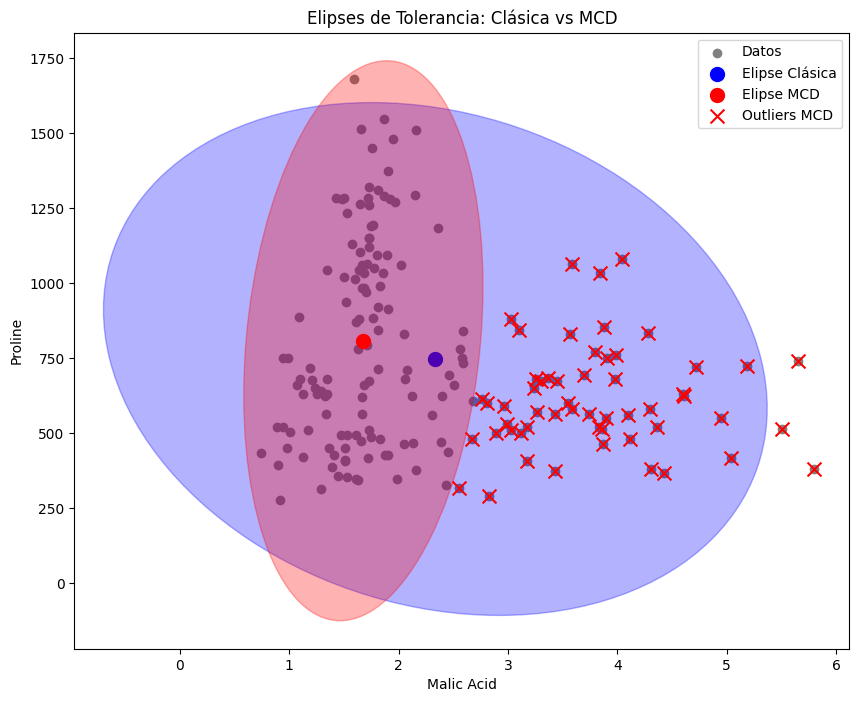

In [36]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.covariance import MinCovDet
from scipy.stats import chi2
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# 1) Importar los datos
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)

# 2) Seleccionar las columnas: 'malic_acid' y 'proline'
X = df[['malic_acid', 'proline']].values
n, p = X.shape  # n = número de muestras, p = 2 (variables)

# 3) Realizar el análisis según la distancia de Mahalanobis normal y con MCD
# --- Estimación Clásica ---
mean_classic = np.mean(X, axis=0)
cov_classic = np.cov(X, rowvar=False)
inv_cov_classic = np.linalg.inv(cov_classic)
dist_mahalanobis = np.array([np.sqrt(np.dot(np.dot((x - mean_classic), inv_cov_classic), (x - mean_classic))) for x in X])

# --- Estimación MCD ---
mcd = MinCovDet()
mcd.fit(X)
mean_mcd = mcd.location_
cov_mcd = mcd.covariance_
inv_cov_mcd = np.linalg.inv(cov_mcd)
dist_mcd = np.array([np.sqrt(np.dot(np.dot((x - mean_mcd), inv_cov_mcd), (x - mean_mcd))) for x in X])

# Umbral chi-cuadrado (97.5%, 2 grados de libertad)
threshold = np.sqrt(chi2.ppf(0.975, df=p))

# Identificar outliers con MCD
outliers_mcd = dist_mcd > threshold
outliers_mcd_idx = np.where(outliers_mcd)[0]

print("Outliers detectados por MCD:", outliers_mcd_idx)
print("Número de outliers:", len(outliers_mcd_idx))

# 4) Graficar los resultados
# Función para graficar elipses
def plot_ellipse(mean, cov, ax, color='blue', label='Elipse'):
    eigenvalues, eigenvectors = np.linalg.eigh(cov)
    order = eigenvalues.argsort()[::-1]
    eigenvalues, eigenvectors = eigenvalues[order], eigenvectors[:, order]
    vx, vy = eigenvectors[:, 0][0], eigenvectors[:, 0][1]
    theta = np.arctan2(vy, vx)
    width, height = 2 * np.sqrt(eigenvalues * chi2.ppf(0.975, df=2))
    ell = Ellipse(xy=mean, width=width, height=height, angle=np.degrees(theta), color=color, alpha=0.3)
    ax.add_patch(ell)
    ax.scatter(mean[0], mean[1], c=color, s=100, label=label)

# Crear la gráfica
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(X[:, 0], X[:, 1], c='gray', label='Datos')
plot_ellipse(mean_classic, cov_classic, ax, color='blue', label='Elipse Clásica')
plot_ellipse(mean_mcd, cov_mcd, ax, color='red', label='Elipse MCD')
ax.scatter(X[outliers_mcd_idx, 0], X[outliers_mcd_idx, 1], c='red', marker='x', s=100, label='Outliers MCD')
ax.set_xlabel('Malic Acid')
ax.set_ylabel('Proline')
ax.set_title('Elipses de Tolerancia: Clásica vs MCD')
ax.legend()
plt.show()


Resumen de Outliers por Modelo:
                     Cantidad de Outliers  Proporción de Outliers
Mahalanobis Clásica                     9                0.050562
Half Space                              6                0.033708
Spatial                                 9                0.050562


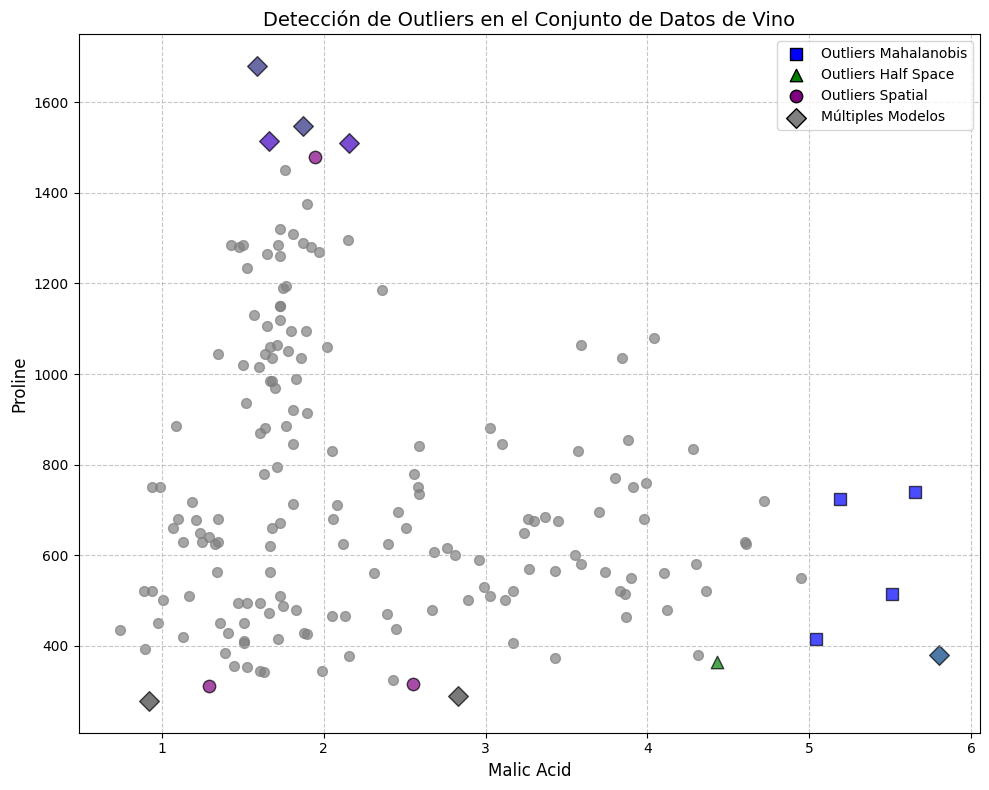

In [37]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from scipy.stats import chi2
from scipy.spatial.distance import mahalanobis, euclidean
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# 1) Importar los datos
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)

# 2) Seleccionar las columnas: 'malic_acid' y 'proline'
X = df[['malic_acid', 'proline']].values
n, p = X.shape  # n = número de muestras, p = 2 (variables)

# 3) Profundidad de Mahalanobis Clásica
mean_classic = np.mean(X, axis=0)
cov_classic = np.cov(X, rowvar=False)
inv_cov_classic = np.linalg.inv(cov_classic)

# Calcular la distancia de Mahalanobis al cuadrado
dist_mahalanobis_sq = np.array([np.dot(np.dot((x - mean_classic), inv_cov_classic), (x - mean_classic)) for x in X])

# Calcular la profundidad de Mahalanobis: D(x) = 1 / (1 + d^2)
depths_mahalanobis = 1 / (1 + dist_mahalanobis_sq)

# Identificar outliers con profundidad de Mahalanobis (percentil 5%)
threshold_mahalanobis = np.percentile(depths_mahalanobis, 5)
outliers_mahalanobis = depths_mahalanobis < threshold_mahalanobis
outliers_mahalanobis_idx = np.where(outliers_mahalanobis)[0]

# 4) Profundidad de Half Space
def halfspace_depth(x, data, num_directions=1000):
    n, d = data.shape
    directions = np.random.randn(num_directions, d)
    directions /= np.linalg.norm(directions, axis=1)[:, np.newaxis]
    projections = np.dot(data, directions.T)
    x_proj = np.dot(x, directions.T)
    proportions = np.sum(projections >= x_proj, axis=0) / n
    depth = np.min(proportions)
    return depth

depths_halfspace = np.array([halfspace_depth(x, X) for x in X])
threshold_halfspace = np.percentile(depths_halfspace, 5)
outliers_halfspace = depths_halfspace < threshold_halfspace
outliers_halfspace_idx = np.where(outliers_halfspace)[0]

# 5) Profundidad Espacial (corregida)
def spatial_depth(x, data):
    directions = []
    for xi in data:
        if not np.array_equal(x, xi):
            diff = xi - x  # X_i - x
            dist = euclidean(xi, x)
            directions.append(diff / dist)
    if directions:
        mean_direction = np.mean(directions, axis=0)  # E[(X - x)/||X - x||]
        u = -mean_direction  # u = -E[(X - x)/||X - x||]
        depth = 1 - np.linalg.norm(u)  # D_s(x) = 1 - ||u||
    else:
        depth = 1
    return depth

depths_spatial = np.array([spatial_depth(x, X) for x in X])
threshold_spatial = np.percentile(depths_spatial, 5)
outliers_spatial = depths_spatial < threshold_spatial
outliers_spatial_idx = np.where(outliers_spatial)[0]

# 6) Graficar los resultados
fig, ax = plt.subplots(figsize=(10, 8))

# Función para combinar colores
def combine_colors(color_list):
    if not color_list:
        return 'gray'
    rgba_colors = [mcolors.to_rgba(c) for c in color_list]
    avg_rgba = np.mean(rgba_colors, axis=0)
    return avg_rgba

# Determinar colores y marcadores de los puntos
colors = []
sizes = []
markers = []
for i in range(n):
    model_colors = []
    model_markers = []
    if outliers_mahalanobis[i]:
        model_colors.append('blue')
        model_markers.append('s')
    if outliers_halfspace[i]:
        model_colors.append('green')
        model_markers.append('^')
    if outliers_spatial[i]:
        model_colors.append('purple')
        model_markers.append('o')
    
    if len(model_colors) == 0:
        colors.append('gray')
        sizes.append(50)
        markers.append('o')  # Círculo por defecto
    elif len(model_colors) == 1:
        colors.append(model_colors[0])
        sizes.append(80)
        markers.append(model_markers[0])
    else:
        colors.append(combine_colors(model_colors))
        sizes.append(100)  # Mayor tamaño para múltiples etiquetas
        markers.append('D')  # Diamante para puntos con múltiples etiquetas

# Graficar todos los puntos
for i in range(n):
    ax.scatter(X[i, 0], X[i, 1], c=[colors[i]], s=sizes[i], marker=markers[i], 
               alpha=0.7, edgecolors='k' if sizes[i] > 50 else None)

# Añadir leyenda para los modelos
ax.scatter([], [], c='blue', marker='s', s=80, edgecolors='k', label='Outliers Mahalanobis')
ax.scatter([], [], c='green', marker='^', s=80, edgecolors='k', label='Outliers Half Space')
ax.scatter([], [], c='purple', marker='o', s=80, edgecolors='k', label='Outliers Spatial')
ax.scatter([], [], c='gray', marker='D', s=100, edgecolors='k', label='Múltiples Modelos')

ax.set_xlabel('Malic Acid', fontsize=12)
ax.set_ylabel('Proline', fontsize=12)
ax.set_title('Detección de Outliers en el Conjunto de Datos de Vino', fontsize=14)
ax.legend(loc='upper right', fontsize=10)
ax.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Guardar la figura
plt.savefig('wine_outliers_spatial_depth_elegant.png')

# 7) Resumen en DataFrame
models = ['Mahalanobis Clásica', 'Half Space', 'Spatial']
outliers_count = {
    'Mahalanobis Clásica': np.sum(outliers_mahalanobis),
    'Half Space': np.sum(outliers_halfspace),
    'Spatial': np.sum(outliers_spatial)
}

outliers_summary = pd.DataFrame({
    'Cantidad de Outliers': [outliers_count[model] for model in models],
    'Proporción de Outliers': [outliers_count[model] / n for model in models]
}, index=models)

print("\nResumen de Outliers por Modelo:")
print(outliers_summary)